<a href="https://colab.research.google.com/github/srosamont/Projects_Ironhack/blob/master/NYC_ride_fare_modelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')

In [5]:
# Lire fichier
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [14]:
path="/content/drive/My Drive/Data/train_2014Clean2.csv"

In [15]:
%%time

df=pd.read_csv(path)


CPU times: user 25.3 s, sys: 5.03 s, total: 30.3 s
Wall time: 42.5 s


In [16]:
df.shape

(8021407, 18)

In [ ]:
%%time
#to Pickle
import pickle
filename = 'fichier2014lu.sav'
pickle.dump(df_2014, open(filename, 'wb'))

#Unpickle
import pickle
df_2014=pickle.load( open('fichier2014lu.sav', "rb" ) )



In [ ]:
#df=pd.to_csv('/content/drive/My Drive/Data/train_2014model.csv')

CPU times: user 50.3 s, sys: 732 ms, total: 51 s
Wall time: 51 s


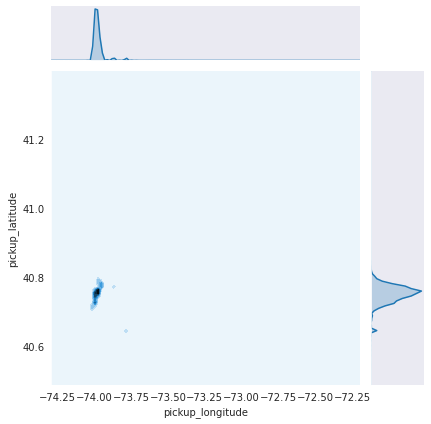

In [ ]:
%%time
df_sample=df.sample(frac=0.01)
sns.jointplot(x='pickup_longitude',y='pickup_latitude',data=df_sample,kind='kde')

In [ ]:
(df.pickup_latitude.max()-df.pickup_latitude.min()),(df.pickup_longitude.max()-df.pickup_longitude.min())

(2.813713, 3.8534719999999965)

In [ ]:
(df.dropoff_latitude.max()-df.dropoff_latitude.min()),(df.dropoff_longitude.max()-df.dropoff_longitude.min())

(2.4977739999999926, 3.559633999999974)

In [ ]:
#df['pick_lat_binned'],bins=pd.cut(x=df.pickup_latitude,bins=140,retbins=True)

In [ ]:
#df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,pick_lat_binned
0,0,2014-02-19 07:22:00.00000074,12.5,2014-02-19 07:22:00 UTC,-73.986430,40.760465,-73.988990,40.737075,1,2014-02-19 07:22:00+00:00,February,8,Wednesday,50,7,19,2.609774,1,"(40.76, 40.77]"
1,1,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22 UTC,-73.979815,40.751902,-73.979446,40.755481,1,2014-12-06 20:36:22+00:00,December,49,Saturday,340,20,6,0.399179,0,"(40.75, 40.76]"
2,2,2014-02-19 16:03:00.000000160,5.5,2014-02-19 16:03:00 UTC,-73.976075,40.752422,-73.981082,40.759285,1,2014-02-19 16:03:00+00:00,February,8,Wednesday,50,16,19,0.871913,1,"(40.75, 40.76]"
3,3,2014-07-16 10:57:00.00000069,5.0,2014-07-16 10:57:00 UTC,-73.996148,40.741890,-73.992202,40.739425,6,2014-07-16 10:57:00+00:00,July,29,Wednesday,197,10,16,0.430871,1,"(40.74, 40.75]"
4,4,2014-05-01 09:12:00.000000198,7.0,2014-05-01 09:12:00 UTC,-73.966203,40.767500,-73.980915,40.774240,6,2014-05-01 09:12:00+00:00,May,18,Thursday,121,9,1,1.447958,1,"(40.76, 40.77]"


In [ ]:
#df['drop_lat_binned'],binsdrop=pd.cut(x=df.dropoff_latitude,bins=bins,retbins=True)

In [ ]:
#df['pick_long_binned'],bins2=pd.cut(x=df.pickup_longitude,bins=192,retbins=True)

In [ ]:
#df['drop_long_binned'],binsdrop2=pd.cut(x=df.dropoff_longitude,bins=bins2,retbins=True)

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,pick_lat_binned,drop_lat_binned,pick_long_binned,drop_long_binned,pickup_position_bin,dropoff_position_bin
0,0,2014-02-19 07:22:00.00000074,12.5,2014-02-19 07:22:00 UTC,-73.986430,40.760465,-73.988990,40.737075,1,2014-02-19 07:22:00+00:00,February,8,Wednesday,50,7,19,2.609774,1,"(40.746, 40.766]","(40.726, 40.746]","(-73.987, -73.967]","(-74.007, -73.987]","(40.76, 40.77](-73.992, -73.982]","(40.73, 40.74](-73.992, -73.982]"
1,1,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22 UTC,-73.979815,40.751902,-73.979446,40.755481,1,2014-12-06 20:36:22+00:00,December,49,Saturday,340,20,6,0.399179,0,"(40.746, 40.766]","(40.746, 40.766]","(-73.987, -73.967]","(-73.987, -73.967]","(40.75, 40.76](-73.982, -73.972]","(40.75, 40.76](-73.982, -73.972]"
2,2,2014-02-19 16:03:00.000000160,5.5,2014-02-19 16:03:00 UTC,-73.976075,40.752422,-73.981082,40.759285,1,2014-02-19 16:03:00+00:00,February,8,Wednesday,50,16,19,0.871913,1,"(40.746, 40.766]","(40.746, 40.766]","(-73.987, -73.967]","(-73.987, -73.967]","(40.75, 40.76](-73.982, -73.972]","(40.75, 40.76](-73.982, -73.972]"
3,3,2014-07-16 10:57:00.00000069,5.0,2014-07-16 10:57:00 UTC,-73.996148,40.741890,-73.992202,40.739425,6,2014-07-16 10:57:00+00:00,July,29,Wednesday,197,10,16,0.430871,1,"(40.726, 40.746]","(40.726, 40.746]","(-74.007, -73.987]","(-74.007, -73.987]","(40.74, 40.75](-74.002, -73.992]","(40.73, 40.74](-74.002, -73.992]"
4,4,2014-05-01 09:12:00.000000198,7.0,2014-05-01 09:12:00 UTC,-73.966203,40.767500,-73.980915,40.774240,6,2014-05-01 09:12:00+00:00,May,18,Thursday,121,9,1,1.447958,1,"(40.766, 40.786]","(40.766, 40.786]","(-73.967, -73.947]","(-73.987, -73.967]","(40.76, 40.77](-73.972, -73.962]","(40.77, 40.78](-73.982, -73.972]"


In [ ]:
#df['pickup_position_bin']=df.pick_lat_binned.astype(str)+df.pick_long_binned.astype(str)

In [ ]:
#df['pickup_position_bin'].value_counts()

In [ ]:
#df['dropoff_position_bin']=df.drop_lat_binned.astype(str)+df.drop_long_binned.astype(str)

In [ ]:
#df['dropoff_position_bin'].value_counts()

In [17]:
df['drop_lat_qcut'],binsq=pd.qcut(x=df.dropoff_latitude,q=20,retbins=True)


In [18]:
df['drop_long_qcut'],binsq2=pd.qcut(x=df.dropoff_longitude,q=20,retbins=True)

In [19]:
df['pick_lat_qcut'],binsq3=pd.qcut(x=df.pickup_latitude,q=20,retbins=True)

In [20]:
df['pick_long_qcut'],binsq4=pd.qcut(x=df.pickup_longitude,q=20,retbins=True)

In [21]:
df['dropoff_position_qcut']=df.drop_lat_qcut.astype(str)+df.drop_long_qcut.astype(str)

In [22]:
df['pickup_position_qcut']=df.pick_lat_qcut.astype(str)+df.pick_long_qcut.astype(str)

In [ ]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,drop_lat_qcut,drop_long_qcut,pick_lat_qcut,pick_long_qcut,dropoff_position_qcut,pickup_position_qcut
0,0,2014-02-19 07:22:00.00000074,12.5,2014-02-19 07:22:00 UTC,-73.986430,40.760465,-73.988990,40.737075,1,2014-02-19 07:22:00+00:00,February,8,Wednesday,50,7,19,2.609774,1,"(40.735, 40.74]","(-73.99, -73.987]","(40.759, 40.762]","(-73.988, -73.986]","(40.735, 40.74](-73.99, -73.987]","(40.759, 40.762](-73.988, -73.986]"
1,1,2014-12-06 20:36:22.0000008,4.0,2014-12-06 20:36:22 UTC,-73.979815,40.751902,-73.979446,40.755481,1,2014-12-06 20:36:22+00:00,December,49,Saturday,340,20,6,0.399179,0,"(40.754, 40.757]","(-73.98, -73.978]","(40.75, 40.753]","(-73.98, -73.978]","(40.754, 40.757](-73.98, -73.978]","(40.75, 40.753](-73.98, -73.978]"
2,2,2014-02-19 16:03:00.000000160,5.5,2014-02-19 16:03:00 UTC,-73.976075,40.752422,-73.981082,40.759285,1,2014-02-19 16:03:00+00:00,February,8,Wednesday,50,16,19,0.871913,1,"(40.757, 40.759]","(-73.982, -73.98]","(40.75, 40.753]","(-73.978, -73.975]","(40.757, 40.759](-73.982, -73.98]","(40.75, 40.753](-73.978, -73.975]"
3,3,2014-07-16 10:57:00.00000069,5.0,2014-07-16 10:57:00 UTC,-73.996148,40.741890,-73.992202,40.739425,6,2014-07-16 10:57:00+00:00,July,29,Wednesday,197,10,16,0.430871,1,"(40.735, 40.74]","(-73.994, -73.992]","(40.74, 40.744]","(-73.999, -73.995]","(40.735, 40.74](-73.994, -73.992]","(40.74, 40.744](-73.999, -73.995]"
4,4,2014-05-01 09:12:00.000000198,7.0,2014-05-01 09:12:00 UTC,-73.966203,40.767500,-73.980915,40.774240,6,2014-05-01 09:12:00+00:00,May,18,Thursday,121,9,1,1.447958,1,"(40.773, 40.777]","(-73.982, -73.98]","(40.767, 40.771]","(-73.968, -73.964]","(40.773, 40.777](-73.982, -73.98]","(40.767, 40.771](-73.968, -73.964]"


In [23]:
#Manhattan distance.
"""60

Euclidean: Take the square root of the sum of the squares of the differences of the coordinates.

For example, if 𝑥=(𝑎,𝑏) and 𝑦=(𝑐,𝑑), the Euclidean distance between 𝑥 and 𝑦 is

square_root((𝑎−𝑐)^2+(𝑏−𝑑)^2.

Manhattan: Take the sum of the absolute values of the differences of the coordinates.

For example, if 𝑥=(𝑎,𝑏) and 𝑦=(𝑐,𝑑), the Manhattan distance between 𝑥 and 𝑦 is

|𝑎−𝑐|+|𝑏−𝑑|.

F"""
#Step 1 - Calculate the difference in degrees longitude and latitude between pickup & dropoff.
# Given a dataframe, add two new features 'abs_diff_longitude' and
# 'abs_diff_latitude' reprensenting the vector from
# the pickup location to the dropoff location. (difference between )


def TravelVectors(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()
    

TravelVectors(df)

In [25]:
#Step 2 - Translate these values into distances (km)
#1 degree of Latitude is equal to 69 miles=111,044736 km
#Longitude vs miles varies depending where we are in the world.
#At the latitude of Manhattan, 1 degree of longitude is equal to approximately 50 miles=80,4672 km

### Converting abs_diff_longitude & lattitude to km...
# Since we are calculating this at New York, we can assign a constant, rather than using a formula
# longitude = degrees of latitude in radians * 111,044736
#1 degree of longitude = 80,4672 km
def convert_km(f):
      df['abs_diff_longitude_km'] = df.abs_diff_longitude*80.4672
      df['abs_diff_latitude_km'] = df.abs_diff_latitude*111.044736
convert_km(df)

In [26]:
#Step 3 - Use trigonometry to correct our distances

### Angle difference between north, and manhattan roadways
meas_ang = 0.506 # 29 degrees = 0.506 radians
import math

##This could be dealt with via a bounding box...

## adding extra features
def add_extra_manh_features(df):
    df['Euclidean'] = (df.abs_diff_latitude_km**2 + df.abs_diff_longitude_km**2)**0.5 ### as the crow flies  
    df['delta_manh_long'] = (df.Euclidean*np.sin(np.arctan(df.abs_diff_longitude_km / df.abs_diff_latitude_km)-meas_ang)).abs()
    df['delta_manh_lat'] = (df.Euclidean*np.cos(np.arctan(df.abs_diff_longitude_km / df.abs_diff_latitude_km)-meas_ang)).abs()
    df['manh_length'] = df.delta_manh_long + df.delta_manh_lat
    df['Euc_error'] = (df['manh_length'] - df['Euclidean'])*100 /  df['Euclidean']

add_extra_manh_features(df)

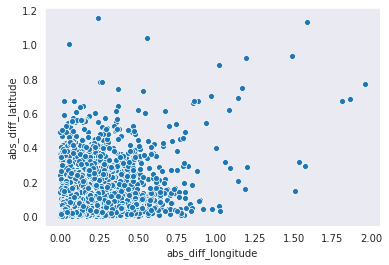

In [ ]:
sns.scatterplot(data=df,x='abs_diff_longitude',y='abs_diff_latitude')

In [ ]:
df.columns

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'date', 'month', 'week_nb',
       'weekday', 'day_nb', 'hour', 'Month_day', 'distance_KM', 'working_days',
       'drop_lat_qcut', 'drop_long_qcut', 'pick_lat_qcut', 'pick_long_qcut',
       'pickup_position_qcut', 'dropoff_position_qcut'],
      dtype='object')

In [ ]:
df['price_per_km_haversine']=df['fare_amount']/df['distance_KM']

In [ ]:
df['price_per_km_manh']=df['fare_amount']/df['manh_length']

In [ ]:
df.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,week_nb,day_nb,hour,Month_day,distance_KM,working_days,abs_diff_longitude,abs_diff_latitude,abs_diff_longitude_km,abs_diff_latitude_km,Euclidean,delta_manh_long,delta_manh_lat,manh_length,Euc_error,price_per_km_haversine,price_per_km_manh
count,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06,8.021407e+06
mean,4.126519e+06,1.289995e+01,-7.397510e+01,4.075048e+01,-7.397417e+01,4.075099e+01,1.698430e+00,2.598298e+01,1.794422e+02,1.352332e+01,1.560304e+01,3.438214e+00,7.104396e-01,2.393320e-02,2.175914e-02,1.925837e+00,2.416238e+00,3.369987e+00,1.118184e+00,3.046879e+00,4.165064e+00,2.288444e+01,9.111722e+01,7.337108e+01
std,2.382350e+06,1.107122e+01,3.561963e-02,2.727385e-02,3.535203e-02,3.164979e-02,1.357418e+00,1.497933e+01,1.049553e+02,6.524590e+00,8.746063e+00,3.777034e+00,4.535584e-01,3.597549e-02,2.375248e-02,2.894847e+00,2.637588e+00,3.677941e+00,1.861274e+00,3.299381e+00,4.747905e+00,1.313205e+01,6.836751e+03,5.433820e+03
min,0.000000e+00,1.000000e-02,-7.593377e+01,3.909806e+01,-7.564957e+01,3.936000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,8.375559e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.046720e-05,2.611180e-08,3.900103e-05,1.093849e-04,4.964529e-06,1.006217e-03,8.022104e-04
25%,2.063406e+06,6.500000e+00,-7.399233e+01,4.073632e+01,-7.399161e+01,4.073495e+01,1.000000e+00,1.300000e+01,8.800000e+01,9.000000e+00,8.000000e+00,1.284402e+00,0.000000e+00,6.405000e-03,7.152000e-03,5.153924e-01,7.941920e-01,1.258475e+00,2.215445e-01,1.113098e+00,1.546660e+00,1.116362e+01,3.341658e+00,2.820735e+00
50%,4.126739e+06,9.500000e+00,-7.398213e+01,4.075311e+01,-7.398046e+01,4.075363e+01,1.000000e+00,2.500000e+01,1.750000e+02,1.400000e+01,1.500000e+01,2.185174e+00,1.000000e+00,1.298500e-02,1.433200e-02,1.044867e+00,1.591493e+00,2.145947e+00,5.380876e-01,1.977351e+00,2.617148e+00,2.398505e+01,4.240803e+00,3.521082e+00
75%,6.189700e+06,1.450000e+01,-7.396831e+01,4.076730e+01,-7.396445e+01,4.076839e+01,2.000000e+00,3.900000e+01,2.720000e+02,1.900000e+01,2.300000e+01,3.992113e+00,1.000000e+00,2.457700e-02,2.750300e-02,1.977642e+00,3.054063e+00,3.935990e+00,1.102403e+00,3.694529e+00,4.713777e+00,3.494069e+01,5.531346e+00,4.571198e+00
max,8.252681e+06,4.675000e+02,-7.208030e+01,4.191177e+01,-7.208994e+01,4.185778e+01,9.000000e+00,5.200000e+01,3.650000e+02,2.300000e+01,3.100000e+01,1.848633e+02,1.000000e+00,1.957202e+00,1.153735e+00,1.574906e+02,1.281162e+02,1.792167e+02,9.841622e+01,1.715927e+02,2.474456e+02,4.142136e+01,3.814749e+06,2.940625e+06


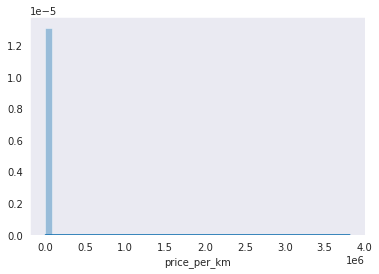

In [ ]:
sns.distplot(df['price_per_km'])

In [ ]:
df['price_per_km_haversine'].max()

3514805.212901558

In [ ]:
df[df['price_per_km_haversine']==3514805.212901558]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,drop_lat_qcut,drop_long_qcut,pick_lat_qcut,pick_long_qcut,dropoff_position_qcut,pickup_position_qcut,abs_diff_longitude,abs_diff_latitude,abs_diff_longitude_km,abs_diff_latitude_km,Euclidean,delta_manh_long,delta_manh_lat,manh_length,Euc_error,price_per_km_haversine,price_per_km_manh
703464,723803,2014-11-13 01:07:50.0000001,298.0,2014-11-13 01:07:50 UTC,-74.623176,40.316436,-74.623175,40.316436,1,2014-11-13 01:07:50+00:00,November,46,Thursday,317,1,13,0.000085,1,"(39.359, 40.702]","(-75.65100000000001, -74.007]","(39.097, 40.709]","(-75.935, -74.007]","(39.359, 40.702](-75.65100000000001, -74.007]","(39.097, 40.709](-75.935, -74.007]",1.000000e-06,0.0,0.00008,0.0,0.00008,0.00007,0.000039,0.000109,35.93726,3.514805e+06,2.724325e+06


In [ ]:
#drop line 3 266 500. Issue in the coordinates. or the passenger was taken back to the same place by the same taxi after a long ride.it would have been great to add the duration
df=df[df['price_per_km_haversine']!=3814749.0233496614]

In [ ]:
df=df[df['price_per_km_haversine']!=3514805.212901558]

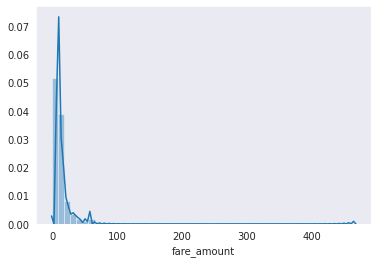

In [8]:
sns.distplot(df['fare_amount'])

In [ ]:
df[df['price_per_km_haversine']>20]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,drop_lat_qcut,drop_long_qcut,pick_lat_qcut,pick_long_qcut,dropoff_position_qcut,pickup_position_qcut,abs_diff_longitude,abs_diff_latitude,abs_diff_longitude_km,abs_diff_latitude_km,Euclidean,delta_manh_long,delta_manh_lat,manh_length,Euc_error,price_per_km_haversine,price_per_km_manh
40,41,2014-03-10 19:50:51.0000001,20.0,2014-03-10 19:50:51 UTC,-73.893177,40.790756,-73.892578,40.788483,1,2014-03-10 19:50:51+00:00,March,11,Monday,69,19,10,0.257728,1,"(40.783, 40.795]","(-73.923, -72.09]","(40.787, 41.912]","(-73.933, -72.08]","(40.783, 40.795](-73.923, -72.09]","(40.787, 41.912](-73.933, -72.08]",0.000599,0.002273,0.048200,0.252405,0.256966,0.080176,0.244138,0.324314,26.208962,77.601281,61.668688
83,86,2014-09-10 12:09:01.0000002,52.0,2014-09-10 12:09:01 UTC,-73.985722,40.749696,-73.973577,40.749010,1,2014-09-10 12:09:01+00:00,September,37,Wednesday,253,12,10,1.025913,1,"(40.748, 40.751]","(-73.976, -73.973]","(40.748, 40.75]","(-73.986, -73.984]","(40.748, 40.751](-73.976, -73.973]","(40.748, 40.75](-73.986, -73.984]",0.012145,0.000686,0.977274,0.076177,0.980239,0.817891,0.540299,1.358189,38.557006,50.686573,38.286271
163,170,2014-02-14 22:34:59.0000002,12.0,2014-02-14 22:34:59 UTC,-73.990149,40.753863,-73.990830,40.758781,1,2014-02-14 22:34:59+00:00,February,7,Friday,45,22,14,0.549857,1,"(40.757, 40.759]","(-73.992, -73.99]","(40.753, 40.756]","(-73.99, -73.988]","(40.757, 40.759](-73.992, -73.99]","(40.753, 40.756](-73.99, -73.988]",0.000681,0.004918,0.054798,0.546118,0.548860,0.216762,0.504244,0.721006,31.364217,21.823868,16.643409
301,311,2014-07-31 16:34:00.00000049,52.0,2014-07-31 16:34:00 UTC,-73.961720,40.776127,-73.961635,40.776195,1,2014-07-31 16:34:00+00:00,July,31,Thursday,212,16,31,0.010412,1,"(40.773, 40.777]","(-73.964, -73.959]","(40.775, 40.78]","(-73.964, -73.958]","(40.773, 40.777](-73.964, -73.959]","(40.775, 40.78](-73.964, -73.958]",0.000085,0.000068,0.006840,0.007551,0.010188,0.002323,0.009920,0.012243,20.165041,4994.453206,4247.435039
337,347,2014-11-19 14:52:35.0000003,17.0,2014-11-19 14:52:35 UTC,-73.958445,40.764284,-73.958515,40.760248,1,2014-11-19 14:52:35+00:00,November,47,Wednesday,323,14,19,0.448821,1,"(40.759, 40.762]","(-73.959, -73.955]","(40.764, 40.767]","(-73.964, -73.958]","(40.759, 40.762](-73.959, -73.955]","(40.764, 40.767](-73.964, -73.958]",0.000070,0.004036,0.005633,0.448177,0.448212,0.212296,0.394746,0.607042,35.436400,37.876978,28.004646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8020908,8252172,2014-06-30 06:35:00.00000065,2.5,2014-06-30 06:35:00 UTC,-73.972385,40.757375,-73.972372,40.757367,1,2014-06-30 06:35:00+00:00,June,27,Monday,181,6,30,0.001411,1,"(40.757, 40.759]","(-73.973, -73.969]","(40.756, 40.759]","(-73.975, -73.972]","(40.757, 40.759](-73.973, -73.969]","(40.756, 40.759](-73.975, -73.972]",0.000013,0.000008,0.001046,0.000888,0.001372,0.000484,0.001284,0.001768,28.860784,1772.085747,1413.651070
8021120,8252390,2014-05-20 06:57:00.000000129,5.5,2014-05-20 06:57:00 UTC,-73.977803,40.735492,-73.977812,40.735392,1,2014-05-20 06:57:00+00:00,May,21,Tuesday,140,6,20,0.011145,1,"(40.735, 40.74]","(-73.978, -73.976]","(40.731, 40.736]","(-73.978, -73.975]","(40.735, 40.74](-73.978, -73.976]","(40.731, 40.736](-73.978, -73.975]",0.000009,0.000100,0.000724,0.011104,0.011128,0.004749,0.010064,0.014813,33.110950,493.480708,371.303715
8021266,8252539,2014-06-17 10:01:40.0000002,21.5,2014-06-17 10:01:40 UTC,-73.964238,40.806712,-73.964448,40.807263,1,2014-06-17 10:01:40+00:00,June,25,Tuesday,168,10,17,0.063767,1,"(40.795, 41.858]","(-73.964, -73.959]","(40.787, 41.912]","(-73.968, -73.964]","(40.795, 41.858](-73.964, -73.959]","(40.787, 41.912](-73.968, -73.964]",0.000210,0.000551,0

In [ ]:
df.describe().round(1)

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,week_nb,day_nb,hour,Month_day,distance_KM,working_days,abs_diff_longitude,abs_diff_latitude,abs_diff_longitude_km,abs_diff_latitude_km,Euclidean,delta_manh_long,delta_manh_lat,manh_length,Euc_error,price_per_km_haversine,price_per_km_manh
count,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0,8021405.0
mean,4126519.7,12.9,-74.0,40.8,-74.0,40.8,1.7,26.0,179.4,13.5,15.6,3.4,0.7,0.0,0.0,1.9,2.4,3.4,1.1,3.0,4.2,22.9,90.2,72.7
std,2382350.3,11.1,0.0,0.0,0.0,0.0,1.4,15.0,105.0,6.5,8.7,3.8,0.5,0.0,0.0,2.9,2.6,3.7,1.9,3.3,4.7,13.1,6586.9,5246.3
min,0.0,0.0,-75.9,39.1,-75.6,39.4,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2063407.0,6.5,-74.0,40.7,-74.0,40.7,1.0,13.0,88.0,9.0,8.0,1.3,0.0,0.0,0.0,0.5,0.8,1.3,0.2,1.1,1.5,11.2,3.3,2.8
50%,4126740.0,9.5,-74.0,40.8,-74.0,40.8,1.0,25.0,175.0,14.0,15.0,2.2,1.0,0.0,0.0,1.0,1.6,2.1,0.5,2.0,2.6,24.0,4.2,3.5
75%,6189700.0,14.5,-74.0,40.8,-74.0,40.8,2.0,39.0,272.0,19.0,23.0,4.0,1.0,0.0,0.0,2.0,3.1,3.9,1.1,3.7,4.7,34.9,5.5,4.6
max,8252681.0,467.5,-72.1,41.9,-72.1,41.9,9.0,52.0,365.0,23.0,31.0,184.9,1.0,2.0,1.2,157.5,128.1,179.2,98.4,171.6,247.4,41.4,3074724.4,2368516.9


In [ ]:
df[df['fare_amount']==0.01]

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,date,month,week_nb,weekday,day_nb,hour,Month_day,distance_KM,working_days,drop_lat_qcut,drop_long_qcut,pick_lat_qcut,pick_long_qcut,dropoff_position_qcut,pickup_position_qcut,abs_diff_longitude,abs_diff_latitude,abs_diff_longitude_km,abs_diff_latitude_km,Euclidean,delta_manh_long,delta_manh_lat,manh_length,Euc_error,price_per_km_haversine,price_per_km_manh
372229,382959,2014-06-29 21:28:48.0000005,0.01,2014-06-29 21:28:48 UTC,-74.010325,40.725071,-74.046156,40.727257,1,2014-06-29 21:28:48+00:00,June,26,Sunday,180,21,29,3.029160,0,"(40.723, 40.729]","(-75.65100000000001, -74.007]","(40.72, 40.726]","(-75.935, -74.007]","(40.723, 40.729](-75.65100000000001, -74.007]","(40.72, 40.726](-75.935, -74.007]",3.583100e-02,2.186000e-03,2.883220,0.242744,2.893421,2.404271,1.609772,4.014043,38.730000,0.003301,0.002491
413059,425053,2014-03-31 19:12:15.0000002,0.01,2014-03-31 19:12:15 UTC,-74.015835,40.714954,-74.015836,40.714953,6,2014-03-31 19:12:15+00:00,March,14,Monday,90,19,31,0.000140,1,"(40.702, 40.716]","(-75.65100000000001, -74.007]","(40.709, 40.72]","(-75.935, -74.007]","(40.702, 40.716](-75.65100000000001, -74.007]","(40.709, 40.72](-75.935, -74.007]",1.000000e-06,1.000000e-06,0.000080,0.000111,0.000137,0.000017,0.000136,0.000153,11.345500,71.670819,65.490790
4633956,4767790,2014-03-31 03:24:08.0000001,0.01,2014-03-31 03:24:08 UTC,-73.994162,40.758329,-73.970324,40.845865,1,2014-03-31 03:24:08+00:00,March,14,Monday,90,3,31,9.938215,1,"(40.795, 41.858]","(-73.973, -73.969]","(40.756, 40.759]","(-73.995, -73.992]","(40.795, 41.858](-73.973, -73.969]","(40.756, 40.759](-73.995, -73.992]",2.383800e-02,8.753600e-02,1.918177,9.720412,9.907866,3.033502,9.432056,12.465558,25.814755,0.001006,0.000802
6810760,7007247,2014-06-29 21:28:29.0000002,0.01,2014-06-29 21:28:29 UTC,-73.958670,40.743635,-73.958670,40.743630,1,2014-06-29 21:28:29+00:00,June,26,Sunday,180,21,29,0.000556,0,"(40.74, 40.744]","(-73.959, -73.955]","(40.74, 40.744]","(-73.964, -73.958]","(40.74, 40.744](-73.959, -73.955]","(40.74, 40.744](-73.964, -73.958]",0.000000e+00,5.000000e-06,0.000000,0.000555,0.000555,0.000269,0.000486,0.000755,35.937260,17.986432,13.249318
7689804,7911626,2014-06-29 05:28:31.0000002,0.01,2014-06-29 05:28:31 UTC,-73.992880,40.753092,-73.982612,40.774192,1,2014-06-29 05:28:31+00:00,June,26,Sunday,180,5,29,2.500509,0,"(40.773, 40.777]","(-73.985, -73.982]","(40.75, 40.753]","(-73.995, -73.992]","(40.773, 40.777](-73.985, -73.982]","(40.75, 40.753](-73.995, -73.992]",1.026800e-02,2.110000e-02,0.826237,2.343044,2.484456,0.412930,2.449900,2.862831,15.229670,0.003999,0.003493


In [27]:
path

'/content/drive/My Drive/Data/train_2014Clean2.csv'

In [28]:
df.to_csv('/content/drive/My Drive/Data/train2014_modelling.csv')

In [3]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,week_nb,day_nb,hour,Month_day,distance_KM,working_days,abs_diff_longitude,abs_diff_latitude,abs_diff_longitude_km,abs_diff_latitude_km,Euclidean,delta_manh_long,delta_manh_lat,manh_length,Euc_error,price_per_km_haversine,price_per_km_manh
count,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06,8.021405e+06
mean,4.010704e+06,4.126520e+06,1.289987e+01,-7.397510e+01,4.075048e+01,-7.397417e+01,4.075099e+01,1.698431e+00,2.598297e+01,1.794422e+02,1.352332e+01,1.560304e+01,3.438215e+00,7.104396e-01,2.393320e-02,2.175915e-02,1.925838e+00,2.416239e+00,3.369988e+00,1.118184e+00,3.046880e+00,4.165065e+00,2.288443e+01,9.020349e+01,7.266487e+01
std,2.315581e+06,2.382350e+06,1.107023e+01,3.561882e-02,2.727342e-02,3.535121e-02,3.164942e-02,1.357418e+00,1.497933e+01,1.049553e+02,6.524589e+00,8.746064e+00,3.777034e+00,4.535584e-01,3.597549e-02,2.375248e-02,2.894847e+00,2.637588e+00,3.677941e+00,1.861274e+00,3.299381e+00,4.747905e+00,1.313205e+01,6.586884e+03,5.246258e+03
min,0.000000e+00,0.000000e+00,1.000000e-02,-7.593377e+01,3.909806e+01,-7.564957e+01,3.936000e+01,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,8.375559e-05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.046720e-05,2.611180e-08,3.900103e-05,1.093849e-04,4.964529e-06,1.006217e-03,8.022104e-04
25%,2.005352e+06,2.063407e+06,6.500000e+00,-7.399233e+01,4.073632e+01,-7.399161e+01,4.073495e+01,1.000000e+00,1.300000e+01,8.800000e+01,9.000000e+00,8.000000e+00,1.284402e+00,0.000000e+00,6.405000e-03,7.152000e-03,5.153924e-01,7.941920e-01,1.258476e+00,2.215445e-01,1.113098e+00,1.546660e+00,1.116362e+01,3.341658e+00,2.820735e+00
50%,4.010704e+06,4.126740e+06,9.500000e+00,-7.398213e+01,4.075311e+01,-7.398046e+01,4.075363e+01,1.000000e+00,2.500000e+01,1.750000e+02,1.400000e+01,1.500000e+01,2.185174e+00,1.000000e+00,1.298500e-02,1.433200e-02,1.044867e+00,1.591493e+00,2.145947e+00,5.380877e-01,1.977352e+00,2.617148e+00,2.398504e+01,4.240801e+00,3.521082e+00
75%,6.016055e+06,6.189700e+06,1.450000e+01,-7.396831e+01,4.076730e+01,-7.396445e+01,4.076839e+01,2.000000e+00,3.900000e+01,2.720000e+02,1.900000e+01,2.300000e+01,3.992113e+00,1.000000e+00,2.457700e-02,2.750300e-02,1.977642e+00,3.054063e+00,3.935990e+00,1.102403e+00,3.694530e+00,4.713778e+00,3.494069e+01,5.531344e+00,4.571198e+00
max,8.021406e+06,8.252681e+06,4.675000e+02,-7.208030e+01,4.191177e+01,-7.208994e+01,4.185778e+01,9.000000e+00,5.200000e+01,3.650000e+02,2.300000e+01,3.100000e+01,1.848633e+02,1.000000e+00,1.957202e+00,1.153735e+00,1.574906e+02,1.281162e+02,1.792167e+02,9.841622e+01,1.715927e+02,2.474456e+02,4.142136e+01,3.074724e+06,2.368517e+06


In [29]:
df=df.sample(frac=0.12)

In [30]:
df.to_csv('/content/drive/My Drive/Data/sample_df_for model.csv')


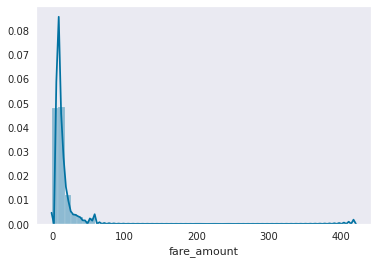

In [31]:
sns.distplot(df.fare_amount)


# MODELING




```
# to test:
```

Clustering then regression,
regression without clustering,
Regression types to test : Linear regression, 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')
from statsmodels.api import OLS
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from yellowbrick.cluster import KElbowVisualizer # find an optimal number of  centroids for clustering
from sklearn.manifold import TSNE # for visualizaion of data with high number of dimension

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [3]:
#model librairies


from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.model_selection import RepeatedStratifiedKFold

#import statsmodels.api as sm
#from statsmodels.genmod.families.links import log



from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.pipeline import Pipeline

In [12]:

#from google.colab import files
#files.download("train2014_modelling.csv")

In [4]:
df=pd.read_csv('/content/drive/My Drive/Data/sample_df_for model.csv')

In [5]:
df.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count', 'date', 'month', 'week_nb',
       'weekday', 'day_nb', 'hour', 'Month_day', 'distance_KM', 'working_days',
       'drop_lat_qcut', 'drop_long_qcut', 'pick_lat_qcut', 'pick_long_qcut',
       'dropoff_position_qcut', 'pickup_position_qcut', 'abs_diff_longitude',
       'abs_diff_latitude', 'abs_diff_longitude_km', 'abs_diff_latitude_km',
       'Euclidean', 'delta_manh_long', 'delta_manh_lat', 'manh_length',
       'Euc_error'],
      dtype='object')

In [7]:
df.drop(['Unnamed: 0','Unnamed: 0.1','key', 'pickup_datetime','week_nb','day_nb','delta_manh_long','delta_manh_lat','abs_diff_longitude','abs_diff_latitude','date','Euc_error'],axis=1,inplace=True)

In [8]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'month',
       'weekday', 'hour', 'Month_day', 'distance_KM', 'working_days',
       'drop_lat_qcut', 'drop_long_qcut', 'pick_lat_qcut', 'pick_long_qcut',
       'dropoff_position_qcut', 'pickup_position_qcut',
       'abs_diff_longitude_km', 'abs_diff_latitude_km', 'Euclidean',
       'manh_length'],
      dtype='object')

In [16]:
#feature selection
#First model (basic: Linear Regression sklearn, no standardization)
#select1=['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude','passenger_count','month',
       'weekday', 'hour', 'Month_day']
#to_predict=df.price_per_km_haversine
#dummies1=['hour','month','weekday']
#R21,MSE1,MAE1
#(4.653916450003681e-05, 47637232.13378159, 174.044451072597)

In [ ]:
#Model2 
#df1=df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
 #      'dropoff_latitude','passenger_count','month',
  #     'weekday', 'hour', 'Month_day','fare_amount']]
#df1=pd.get_dummies(data=df1, columns=['hour','month','weekday'],drop_first=True)

#OLS(y_train,add_constant(X_train)).fit().summary()

#results R-square 0.312

In [ ]:
# Model 3 with cross features
#df1=df[['dropoff_position_qcut', 'pickup_position_qcut','passenger_count','month',
 #      'weekday', 'hour', 'Month_day','fare_amount','distance_KM']]
#df1=pd.get_dummies(data=df1, columns=['hour','month','weekday','pickup_position_qcut','dropoff_position_qcut'],drop_first=True)
R21,MSE1,MAE1
(0.819391535497292, 22.452806362365607, 2.2695797541048117)
#linear regression

In [6]:
# transform to dummies
df1=df.sample(frac=0.1)
df1=df1[['dropoff_position_qcut', 'pickup_position_qcut','passenger_count','month',
       'weekday', 'hour', 'Month_day','fare_amount','distance_KM']]
df1=pd.get_dummies(data=df1, columns=['hour','month','weekday','pickup_position_qcut','dropoff_position_qcut'],drop_first=True)

In [11]:
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df1)


AttributeError: ignored

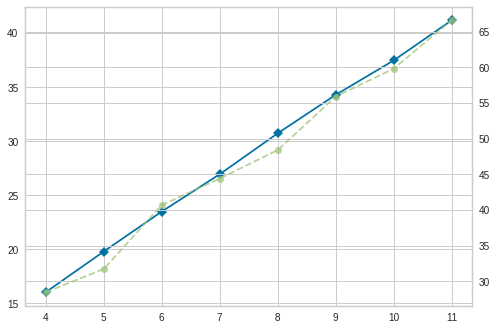

In [14]:
a
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12))

visualizer.fit(scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [12]:
#PCA 
# define PCA toget 85% of explained variance, fit the PCA model and check the number of components; Here 23
pca=PCA(0.85)
pca.fit(scaled)
pca.explained_variance_ratio_

array([0.03361578, 0.03195951, 0.03082114, 0.02979441, 0.0282617 ,
       0.01996857, 0.01927587, 0.01911536, 0.01867463, 0.01808468,
       0.01771645, 0.01746724, 0.01723193, 0.01708223, 0.01679172,
       0.01661272, 0.01599586, 0.01336439, 0.01304317, 0.01267237,
       0.01245834, 0.01193663, 0.01098912, 0.01085536, 0.01076983,
       0.01072937, 0.01053177, 0.01029534, 0.01003366, 0.0098559 ,
       0.0096367 , 0.00850377, 0.0081234 , 0.00642999, 0.00561857,
       0.00514108, 0.00478792, 0.00461173, 0.00450171, 0.00411837,
       0.00345125, 0.00308623, 0.00275691, 0.00265622, 0.00262353,
       0.0024627 , 0.00242061, 0.00238578, 0.00236066, 0.00234454,
       0.00229589, 0.0022668 , 0.00225583, 0.0022311 , 0.0021884 ,
       0.00216801, 0.00214618, 0.00213929, 0.0020221 , 0.00200196,
       0.00195183, 0.00191654, 0.00190038, 0.00188859, 0.00188139,
       0.0017642 , 0.0017252 , 0.00171537, 0.00170643, 0.00168678,
       0.00166277, 0.00163337, 0.00162685, 0.00161534, 0.00158

In [13]:
#apply pCA transformation 
pca_df=pd.DataFrame(pca.transform(scaled))

In [ ]:
df1[['dropoff_position_qcut', 'pickup_position_qcut','passenger_count','month',
       'weekday', 'hour', 'Month_day','fare_amount','distance_KM']]

In [ ]:
#TSNE

X_tsne=df1.drop(['fare_amount','distance_KM'],axis=1)
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler4 = MinMaxScaler()
# transform data
X_tsne= scaler4.fit_transform(X_tsne)
tsne=TSNE(n_components=2,verbose=1,n_iter=250)
tsne_results=tsne.fit_transform(X_tsne)
tsne_results.shape
df1['tsne2D1']=tsne_results[:,0]
df1['tsne2D2']=tsne_results[:,1]

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 96257 samples in 63.799s...


In [8]:
# splitting  dataset into train and test 1
X_train, X_test,y_train,y_test = train_test_split(df1.drop(['fare_amount'],axis=1), \
                                                  df1.fare_amount, \
                                                  test_size=1/3, \
                                                  random_state=42)

In [15]:
#SGD REGRESSOR model 4



# Always scale the input. The most convenient way is to use a pipeline.
reg = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
reg.fit(X_train, y_train)
Pipeline(steps=[('MinMaxScaler()', MinMaxScaler()),
                ('sgdregressor', SGDRegressor())])


Pipeline(memory=None,
         steps=[('MinMaxScaler()',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=1000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [16]:
y_pred4=reg.predict(X_test)
R24=r2_score(y_test,y_pred4)
MSE1=mean_squared_error(y_test,y_pred4)
MAE1=mean_absolute_error(y_test,y_pred4)

In [17]:

R24,MSE1,MAE1

(-6.092546894431306e+21, 7.36448503093143e+23, 22673769810.012188)

In [11]:

#MOdel 5 LINEAR  WITH SCALER
# Always scale the input. The most convenient way is to use a pipeline.
reg5 = make_pipeline(MinMaxScaler(),LinearRegression())
reg5.fit(X_train, y_train)
Pipeline(steps=[('MinMaxScaler()', MinMaxScaler()),
                ('LinearRegression', LinearRegression())])





Pipeline(memory=None,
         steps=[('MinMaxScaler()',
                 MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('LinearRegression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [16]:
y_pred5=reg5.predict(X_test)
R25=r2_score(y_test,y_pred5)
MSE5=mean_squared_error(y_test,y_pred5)
MAE5=mean_absolute_error(y_test,y_pred5)


In [17]:
R25,MSE5,MAE5

(-1.1452903954289258e+19, 1.4412683096526684e+21, 326907185.5751058)

In [ ]:
#MODEL 5 Decision Tree

In [10]:
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(df1.drop(['price_per_km_haversine'],axis=1))

In [ ]:
#usig a sample
df1_Sample=df1.sample(frac=0.1)

In [9]:
# LINEAR REGRESSION ()SKLEARN without scaler
linreg = LinearRegression()
linreg.fit(X_train,y_train)
y_pred1=linreg.predict(X_test)
R21=r2_score(y_test,y_pred1)
MSE1=mean_squared_error(y_test,y_pred1)
MAE1=mean_absolute_error(y_test,y_pred1)


In [10]:
R21,MSE1,MAE1

(-5849945551791741.0, 7.590316707927036e+17, 7326700.311206496)

In [ ]:
#TSNE
df_ml3Sample=pd.get_dummies(data=df_ml3Sample,columns=['month','weekday'],drop_first=True)
X_tsne=df_ml3Sample.drop(['cluster'],axis=1)
#Normalization of data with MinMaxscaler (not standardization since not sure the distribution is normal)
# define min max scaler
scaler4 = MinMaxScaler()
# transform data
X_tsne= scaler4.fit_transform(X_tsne)
tsne=TSNE(n_components=2,verbose=1,n_iter=1000)
tsne_results=tsne.fit_transform(X_tsne)
tsne_results.shape
df_ml3Sample['tsne2D1']=tsne_results[:,0]
df_ml3Sample['tsne2D2']=tsne_results[:,1]

In [11]:
OLS(y_train,add_constant(X_train)).fit().summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     472.9
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:04:15   Log-Likelihood:            -1.8398e+05
No. Observations:               64171   AIC:                         3.694e+05
Df Residuals:                   63428   BIC:                         3.762e+05
Df Model:                         742                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                   5.2021      0.287     18.143      0.000       4.640       5.764
passenger_count                                                         0.0320      0.013      2.557      0.011       0.007       0.057
Month_day                                                              -0.0004      0.002     -0.218      0.827      -0.004       0.003
distance_KM                                                             2.4887      0.007    354.353      0.000       2.475       2.502
hour_1                                                                 -0.4461      0.133     -3.359      0.001      -0.706      -0.186
hour_2                                                                 -0.3587      0.145     -2.474      0.013      -0.643      -0.075
hour_3                                                                 -0.3448      0.165     -2.092      0.036      -0.668      -0.022
hour_4                                                                 -0.9730      0.178     -5.466      0.000      -1.322      -0.624
hour_5                                                                 -0.6462      0.187     -3.448      0.001      -1.013      -0.279
hour_6                                                                 -0.7764      0.147     -5.295      0.000      -1.064      -0.489
hour_7                                                                 -0.0936      0.127     -0.738      0.461      -0.342       0.155
hour_8                                                                  1.0089      0.120      8.388      0.000       0.773       1.245
hour_9                                                                  1.3674      0.119     11.448      0.000       1.133       1.601
hour_10                                                                 1.3898      0.119     11.709      0.000       1.157       1.622
hour_11                                                                 1.4189      0.118     12.038      0.000       1.188       1.650
hour_12                                                                 1.6599      0.116     14.294      0.000       1.432       1.887
hour_13                                                                 1.5039      0.117     12.821      0.000       1.274       1.734
hour_14                                                                 1.5643      0.117     13.360      0.000       1.335       1.794
hour_15                                                                 1.5791      0.118     13.348      0.000       1.347       1.811
hour_16                                                                 1.4910      0.121  

In [29]:
X=func("month_March",X)

NameError: ignored

In [32]:
X=X_train
y=y_train

 # P-Hacking

In [33]:
def func(column, X=X,y=y):
    if column:
        X=X.drop(column, axis=1)
    
    #build the model
    model=OLS(y,add_constant(X))
    model_fit=model.fit()
    display(model_fit.summary())
    return X

In [ ]:
class Assumption_Tester_OLS:
    """
    X - Pandas DataFrame with numerical values. Independent Variable
    y - Series with numerical values. Dependent Variable
    
    Tests a linear regression on the model to see if assumptions are being met

    """
    
    from sklearn.linear_model import LinearRegression
    
    def __init__(self, X,y):
        from numpy import ndarray
        from pandas import concat
        from pandas.core.frame import DataFrame
        from pandas.core.series import Series

        if type(X) == ndarray:
            self.features = ['X'+str(feature+1) for feature in range(X.shape[1])]
        elif type(X) == DataFrame:
            self.features=X.columns.to_list()
        else:
            print('Expected numpy array or pandas dataframe as X')
            return
        if type(y) == ndarray:
            self.output = 'y'
        elif type(y) == DataFrame:
            self.output=y.columns[0]
        elif type(y) == Series:
            self.output=y.name
        else:
            print('Expected numpy array or pandas dataframe as X')
            return

        self.X = X.values if type(X)==DataFrame else X
        self.y=y.iloc[:,0].values if type(y)==DataFrame else y.values if type(y)==Series else y
        
        self.model='not built yet'
        self.r2=0
        self.results={'Satisfied':[],'Potentially':[],'Violated':[]}
    
    def fit_model(self):
        from sklearn.linear_model import LinearRegression
        
        print('Fitting linear regression')        
        
        #Multi-threading when needed
        if self.X.shape[0] > 100000:
            self.model = LinearRegression(n_jobs=-1)
        else:
            self.model = LinearRegression()
        self.model.fit(self.X, self.y)
        
        self.predictions = self.model.predict(self.X)
        self.resid = self.y - self.predictions
        
        
    def build_model(self):
        self.fit_model()
        
        # Returning linear regression R^2 and coefficients before performing diagnostics
        self.r2 = self.model.score(self.X, self.y)
        print()
        print('R^2:', self.r2, '\n')
        print('Coefficients')
        print('-------------------------------------')
        print('Intercept:', self.model.intercept_)
        for idx,feature in enumerate(self.model.coef_):
            print(f'{self.features[idx]}: {round(feature,2)}')

    def linearity(self):
        """
        Linearity: Assumes there is a linear relationship between the predictors and
                   the response variable. If not, either a polynomial term or another
                   algorithm should be used.
        """
        from pandas import concat
        from numpy import arange
        from pandas.core.frame import DataFrame
        from pandas.core.series import Series        
        import seaborn as sns
        sns.set()
        import matplotlib.pyplot as plt
        
        if type(self.model)==str:
            self.fit_model()
        
        print('\n=======================================================================================')
        print('Assumption 1: Linear Relationship between the Target and the Features')
        print('Checking with a scatter plot of actual vs. predicted. Predictions should follow the diagonal line.')
        
        # Plotting the actual vs predicted values
        sns.regplot(self.y,self.predictions, fit_reg=False)
        
        # Plotting the diagonal line
        line_coords = arange(min(self.y.min(),self.predictions.min()), max(self.y.max(),self.predictions.max()))
        plt.plot(line_coords, line_coords,  # X and y points
                 color='darkorange', linestyle='--')
        plt.title('Actual vs. Predicted')
        plt.show()
        print('If non-linearity is apparent, consider adding a polynomial term \n\t\tor using box-cox transformation to make X or y follow normal distribution')
        
        print('\n\n\nBuilding a correlation table')
        print('\n=======================================================================================')
        df=concat([DataFrame(self.X),Series(self.y)],axis=1)
        df.columns=self.features+[self.output]
        df_corr=df[df.nunique()[df.nunique()>2].index].corr()[self.output].drop(self.output)
        
        print(f'\nParameters that are most likely VIOLATE linearity assumption and their correlation with {self.output}')
        display(df_corr[abs(df_corr)<0.25])

        print(f'\nParameters that are most likely FOLLOW linearity assumption and their correlation with {self.output}')
        display(df_corr[abs(df_corr)>=0.25])
        
        
        if df_corr[abs(df_corr)<0.25].shape[0]==0:
            self.results['Satisfied'].append('Linearity')
        elif df_corr[abs(df_corr)>=0.25].shape[0]==0:
            self.results['Violated'].append('Linearity')
        else:
            self.results['Potentially'].append('Linearity')
        
    def multicollinearity(self):
        """
        Multicollinearity: Assumes that predictors are not correlated with each other. If there is
                           correlation among the predictors, then either remove prepdictors with high
                           Variance Inflation Factor (VIF) values or perform dimensionality reduction
                           This assumption being violated causes issues with interpretability of the 
                           coefficients and the standard errors of the coefficients.
        """
        from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
        import matplotlib.pyplot as plt
        import seaborn as sns
        from pandas.core.frame import DataFrame
        sns.set()
        
        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 2: Little to no multicollinearity among predictors')
        # Plotting the heatmap
        plt.figure(figsize = (10,8))
        sns.heatmap(DataFrame(self.X, columns=self.features).corr(), annot=len(self.features)<10, center=0, cmap=sns.diverging_palette(220, 20, as_cmap=True))
        plt.title('Correlation of Variables')
        plt.show()
        print('Variance Inflation Factors (VIF)')
        print('> 10: An indication that multicollinearity may be present')
        print('> 100: Certain multicollinearity among the variables')
        print('-------------------------------------')
        # Gathering the VIF for each variable
        vifs = {i:VIF(self.X, idx) for idx,i in enumerate(self.features)}
        vifs = dict(sorted(vifs.items(), key=lambda x: x[1], reverse=True))
        for key, vif in vifs.items():
            print(f'{key}: {vif}')
        # Gathering and printing total cases of possible or definite multicollinearity
        possible_multicollinearity = sum([1 for vif in vifs.values() if vif > 10])
        definite_multicollinearity = sum([1 for vif in vifs.values() if vif > 100])
        print()
        print(f'{possible_multicollinearity} cases of possible multicollinearity')
        print(f'{definite_multicollinearity} cases of definite multicollinearity')
        print()
        if definite_multicollinearity == 0:
            if possible_multicollinearity == 0:
                print('Assumption satisfied')
                self.results['Satisfied'].append('Multicollinearity')
            else:
                print('Assumption possibly satisfied')
                print()
                print('Coefficient interpretability may be problematic')
                print('Consider removing variables with a high Variance Inflation Factor (VIF)')
                self.results['Potentially'].append('Multicollinearity')

        else:
            print('Assumption not satisfied')
            print()
            print('Coefficient interpretability will be problematic')
            print('Consider removing variables with a high Variance Inflation Factor (VIF)')
            self.results['Violated'].append('Multicollinearity')
            

    
    def autocorrelation(self):
        """
        Autocorrelation: Assumes that there is no autocorrelation in the residuals. If there is
                         autocorrelation, then there is a pattern that is not explained due to
                         the current value being dependent on the previous value.
                         This may be resolved by adding a lag variable of either the dependent
                         variable or some of the predictors.
        """
        from statsmodels.stats.stattools import durbin_watson        
        
        if type(self.model)==str:
            self.fit_model()
        print('\n=======================================================================================')
        print('Assumption 3: No Autocorrelation')
        print('\nPerforming Durbin-Watson Test')
        print('Values of 1.5 < d < 2.5 generally show that there is no autocorrelation in the data')
        print('0 to 2< is positive autocorrelation')
        print('>2 to 4 is negative autocorrelation')
        print('-------------------------------------')
        durbinWatson = durbin_watson(self.resid)
        print('Durbin-Watson:', durbinWatson)
        if durbinWatson < 1.5:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            self.results['Violated'].append('Autocorrelation')
        elif durbinWatson > 2.5:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption not satisfied', '\n')
            self.results['Violated'].append('Autocorrelation')
        else:
            print('Little to no autocorrelation', '\n')
            print('Assumption satisfied')
            self.results['Satisfied'].append('Autocorrelation')
            

    def homoskedasticity(self,p_value_thresh=0.05):
        """
        Homoskedasticity: Assumes that the errors exhibit constant variance
        """
        
        from statsmodels.stats.diagnostic import het_breuschpagan
        
        import matplotlib.pyplot as plt
        import seaborn
        from numpy import repeat
        seaborn.set()
        
        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 4: Homoskedasticity of Error Terms')
        print('Residuals should have relative constant variance')
        # Plotting the residuals
        plt.subplots(figsize=(12, 6))
        ax = plt.subplot(111)  # To remove spines
        plt.scatter(x=range(self.X.shape[0]), y=self.resid, alpha=0.5)
        plt.plot(repeat(0, self.X.shape[0]), color='darkorange', linestyle='--')
        ax.spines['right'].set_visible(False)  # Removing the right spine
        ax.spines['top'].set_visible(False)  # Removing the top spine
        plt.title('Residuals')
        plt.show() 
        print('If heteroskedasticity is apparent, confidence intervals and predictions will be affected')        
        print('\nConsider removing outliers and preprocessing features - nonlinear transformation can help')
        
        lnames=['Lagrange Multiplier', 'pvalue for LM','F stats','pvalue for Fstats']
        display({lnames[idx]:het_breuschpagan(self.resid,self.X)[idx] for idx in range(4)})
        if het_breuschpagan(self.resid,self.X)[3] < p_value_thresh:
            print('Signs of positive autocorrelation', '\n')
            print('Assumption potentially not satisfied', '\n')
            self.results['Potentially'].append('Autocorrelation')
        else:
            print('Signs of negative autocorrelation', '\n')
            print('Assumption satisfied', '\n')
            self.results['Satisfied'].append('Autocorrelation')

       
        
    def normality_resid(self,p_value_thresh=0.05):
        """
        Normality: Assumes that the error terms are normally distributed. If they are not,
        nonlinear transformations of variables may solve this.
        This assumption being violated primarily causes issues with the confidence intervals
        """
        from statsmodels.stats.diagnostic import normal_ad
        from scipy.stats import probplot
        import pylab
        import matplotlib.pyplot as plt
        import seaborn as sns
        from numpy import quantile,logical_or
        sns.set()

        if type(self.model)==str:
            self.fit_model()
            
        print('\n=======================================================================================')
        print('Assumption 5: The error terms are kinda normally distributed')
        print()
        print('Using the Anderson-Darling test for normal distribution')
        # Performing the test on the residuals
        p_value = normal_ad(self.resid)[1]
        print('p-value from the test - below 0.05 generally means non-normal:', p_value)
        # Reporting the normality of the residuals
        if p_value < p_value_thresh:
            print('Residuals are not normally distributed')
        else:
            print('Residuals are normally distributed')
        # Plotting the residuals distribution
        plt.subplots(figsize=(12, 6))
        plt.title('Distribution of Residuals')
        sns.distplot(self.resid)
        plt.show()
        print()
        if p_value > p_value_thresh:
            print('Assumption satisfied')
            self.results['Satisfied'].append('Normality')
        else:
            print('Assumption not satisfied')
            self.results['Violated'].append('Normality')
            print()
            print('Confidence intervals will likely be affected')
            print('Try performing nonlinear transformations on variables')
    
    
        print('Building a probability plot')
        quantiles=probplot(self.resid, dist='norm', plot=pylab);
        plt.show()
        qqq=(quantiles[0][1]-quantiles[0][1].mean())/quantiles[0][1].std()-quantiles[0][0]
        q75=quantile(qqq,0.75)
        q25=quantile(qqq,0.25)

        outliers_share=(logical_or(qqq>q75+(q75-q25)*1.7, qqq<q25-(q75-q25)*1.7).sum()/qqq.shape[0]).round(3)
        if outliers_share<0.005:
            print('Assumption can be considered as satisfied.')
            self.results['Satisfied'].append('Sub-Normality')
        elif outliers_share<0.05:
            self.results['Potentially'].append('Sub-Normality')
            print(f'\nIn your dataset you quite fat tails. You have {outliers_share} potential outliers ({logical_or(qqq>q75+(q75-q25)*1.7, qqq<q25-(q75-q25)*1.7).sum()} rows)')
        else:
            print(f'\nIn fact outliers are super significant. Probably it is better to split your dataset into 2 different ones.')
            self.results['Violated'].append('Sub-Normality')


    def run_all(self):
        self.build_model()
        self.linearity()
        self.multicollinearity()
        self.autocorrelation()
        self.homoskedasticity()
        self.normality_resid()
        display(self.results)




In [ ]:
# Working model

# Working model

In [13]:
#Librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('dark')
from statsmodels.api import OLS
from statsmodels.api import add_constant
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse,rmse,meanabs

In [14]:
# Working model
df=pd.read_csv('/content/drive/My Drive/Data/sample_df_for model.csv')

In [15]:
df.drop(['Unnamed: 0','Unnamed: 0.1','key', 'pickup_datetime','week_nb','day_nb','delta_manh_long','delta_manh_lat','abs_diff_longitude','abs_diff_latitude','date','Euc_error'],axis=1,inplace=True)

In [17]:
df.columns

Index(['fare_amount', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'passenger_count', 'month',
       'weekday', 'hour', 'Month_day', 'distance_KM', 'working_days',
       'drop_lat_qcut', 'drop_long_qcut', 'pick_lat_qcut', 'pick_long_qcut',
       'dropoff_position_qcut', 'pickup_position_qcut',
       'abs_diff_longitude_km', 'abs_diff_latitude_km', 'Euclidean',
       'manh_length'],
      dtype='object')

In [21]:
# transform to dummies
df1=df.sample(frac=0.1)


In [22]:
df2=df1[['dropoff_position_qcut', 'pickup_position_qcut','passenger_count','month',
       'weekday', 'hour', 'Month_day','fare_amount','manh_length']]
df2=pd.get_dummies(data=df2, columns=['hour','month','weekday','pickup_position_qcut','dropoff_position_qcut'],drop_first=True)

In [23]:
df1=df1[['dropoff_position_qcut', 'pickup_position_qcut','passenger_count','month',
       'weekday', 'hour', 'Month_day','fare_amount','distance_KM']]
df1=pd.get_dummies(data=df1, columns=['hour','month','weekday','pickup_position_qcut','dropoff_position_qcut'],drop_first=True)

In [24]:
# splitting  dataset into train and test 1
X_train, X_test,y_train,y_test = train_test_split(df2.drop(['fare_amount'],axis=1), \
                                                  df2.fare_amount, \
                                                  test_size=1/3, \
                                                  random_state=42)

In [25]:

model2=OLS(y_train,add_constant(X_train))
model_fit2=model2.fit()
model_fit2.summary()

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:1294: RuntimeWarning: invalid value encountered in true_divide
  return self.params / self.bse
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     447.4
Date:                Fri, 07 Aug 2020   Prob (F-statistic):               0.00
Time:                        00:36:37   Log-Likelihood:            -1.8586e+05
No. Observations:               64171   AIC:                         3.732e+05
Df Residuals:                   63424   BIC:                         3.800e+05
Df Model:                         746                                         
Covariance Type:            nonrobust                                         
=======================================================================================================================================
                                                                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------
const                                                                   4.2050      0.290     14.523      0.000       3.637       4.772
passenger_count                                                         0.0430      0.013      3.318      0.001       0.018       0.068
Month_day                                                              -0.0004      0.002     -0.193      0.847      -0.004       0.004
manh_length                                                             1.9991      0.006    348.258      0.000       1.988       2.010
hour_1                                                                 -0.1401      0.136     -1.033      0.302      -0.406       0.126
hour_2                                                                 -0.4755      0.148     -3.206      0.001      -0.766      -0.185
hour_3                                                                 -0.2259      0.170     -1.328      0.184      -0.559       0.108
hour_4                                                                 -0.4857      0.186     -2.612      0.009      -0.850      -0.121
hour_5                                                                 -1.0450      0.198     -5.291      0.000      -1.432      -0.658
hour_6                                                                 -1.0183      0.151     -6.752      0.000      -1.314      -0.723
hour_7                                                                  0.0005      0.129      0.004      0.997      -0.252       0.253
hour_8                                                                  0.7769      0.124      6.290      0.000       0.535       1.019
hour_9                                                                  1.2653      0.123     10.325      0.000       1.025       1.506
hour_10                                                                 1.1651      0.122      9.569      0.000       0.926       1.404
hour_11                                                                 1.3471      0.120     11.189      0.000       1.111       1.583
hour_12                                                                 1.5795      0.120     13.189      0.000       1.345       1.814
hour_13                                                                 1.4577      0.120     12.123      0.000       1.222       1.693
hour_14                                                                 1.5454      0.119     12.959      0.000       1.312       1.779
hour_15                                                                 1.5645      0.120     13.050      0.000       1.330       1.799
hour_16                                                                 1.3962      0.125  

In [1]:
y_pred2=model_fit2.predict(X_test)
R21=model_fit2.rsquared(y_test,y_pred2)
MSE2=mse(y_test,y_pred2)
RMSE2=rmse(y_test,y_pred2)
MAE1=meanabs(y_test,y_pred2)

NameError: ignored

In [ ]:
mse,rmse,meanabs